SELECT * <br>
FROM global_data;<br>

<br>
SELECT * <br>
FROM city_data <br>
WHERE city='Kiev'; <br>


SELECT * <br>
FROM city_data <br>
WHERE city='New York'; <br>

I'm going to use Jupyter notebook and pandas. The data was derived by SQL.<br>
The moving average will be calculated by pd.rolling().mean()<br>
The goal is to show the trends for Kiev, New York and compare them to the global trend.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
kiev_data=pd.read_csv('Kiev.csv',index_col='year')
new_york_data=pd.read_csv('new_york.csv',index_col='year')
global_data=pd.read_csv('global_data.csv',index_col='year')
global_data=global_data.rename(columns={'avg_temp': 'world_avg_temp'})

In [2]:
kiev_data=kiev_data.dropna()
global_data=global_data.dropna()
new_york_data=new_york_data.dropna()

In [3]:
kiev_data.head()

,city,country,avg_temp
year,,,
1743,Kiev,Ukraine,0.90
1744,Kiev,Ukraine,9.50
1745,Kiev,Ukraine,-2.48
1750,Kiev,Ukraine,7.85
1751,Kiev,Ukraine,8.11


In [4]:
kiev_data['MA'] = kiev_data['avg_temp'].rolling(window=10).mean()
global_data['MA']=global_data['world_avg_temp'].rolling(window=10).mean()
new_york_data['MA'] = new_york_data['avg_temp'].rolling(window=10).mean()

In [5]:
kiev_data.head(20)

,city,country,avg_temp,MA
year,,,,
1743,Kiev,Ukraine,0.90,NaN
1744,Kiev,Ukraine,9.50,NaN
1745,Kiev,Ukraine,-2.48,NaN
1750,Kiev,Ukraine,7.85,NaN
1751,Kiev,Ukraine,8.11,NaN
1752,Kiev,Ukraine,1.21,NaN
1753,Kiev,Ukraine,6.90,NaN
1754,Kiev,Ukraine,7.02,NaN
1755,Kiev,Ukraine,6.88,NaN


In [6]:
def plot_data(input_data,name):
    ax=input_data['MA'].dropna().plot(figsize=(12, 9),title=name)
    ax.set(ylabel='average temperature')

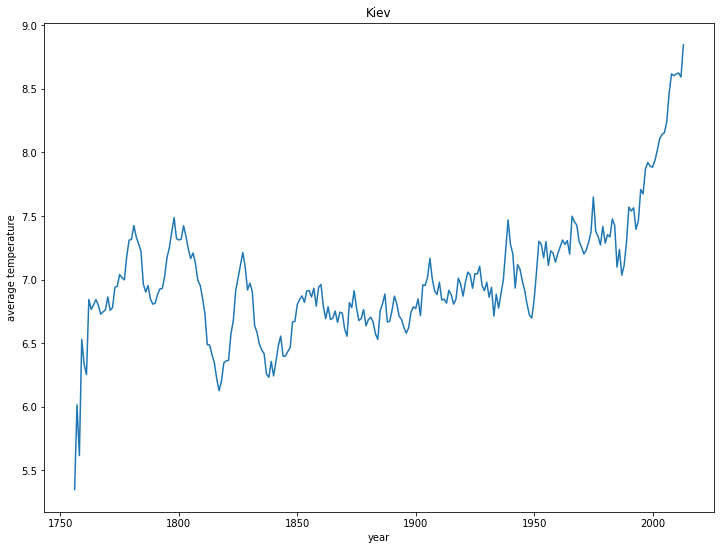

In [7]:
plot_data(kiev_data,'Kiev')

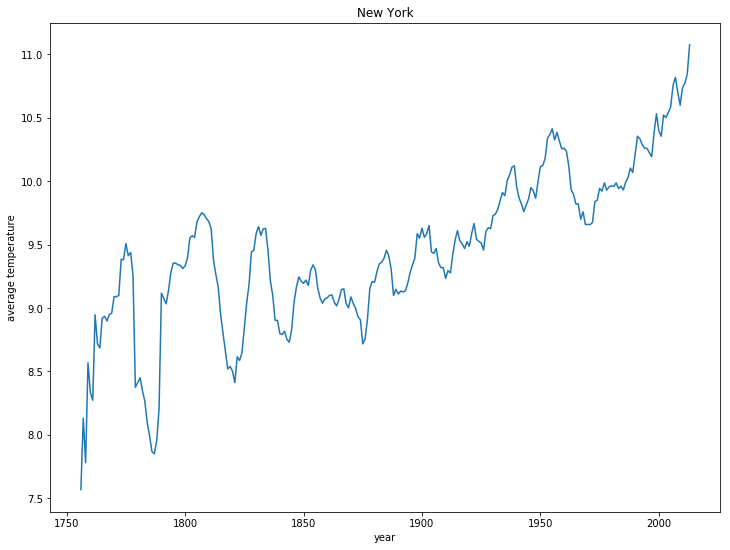

In [8]:
plot_data(new_york_data,'New York')

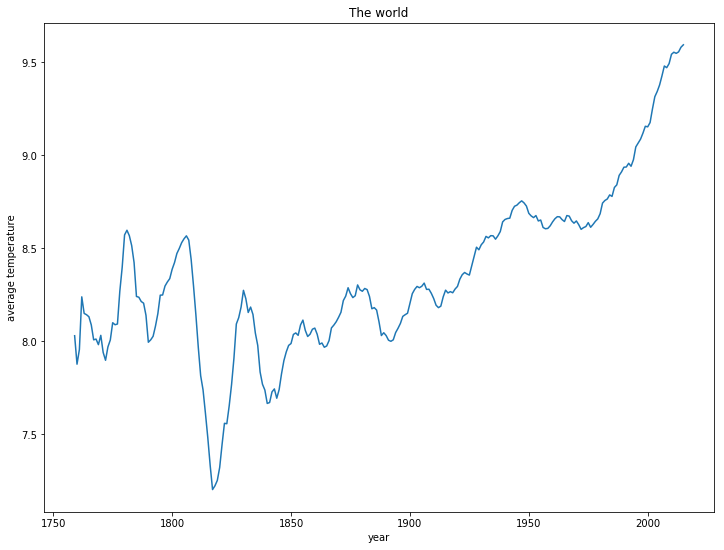

In [9]:
plot_data(global_data,'The world')

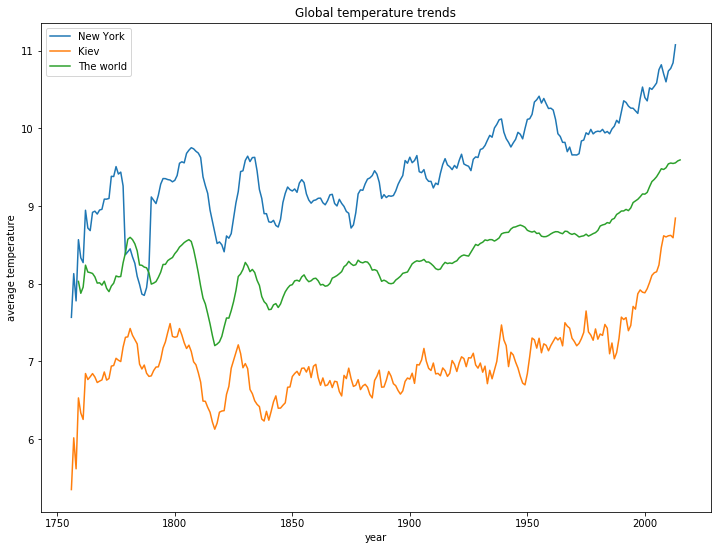

In [10]:
plot_data(new_york_data,'New York')
plot_data(kiev_data,'Kiev')
plot_data(global_data,'Global temperature trends')
plt.legend(['New York', 'Kiev','The world'])

Correlation

In [11]:
kiev_correlation_data = pd.concat([kiev_data['avg_temp'], global_data['world_avg_temp']], axis=1)
kiev_correlation_data.corr()

,avg_temp,world_avg_temp
avg_temp,1.000000,0.639127
world_avg_temp,0.639127,1.000000


Correlation coefficient 0.639127 or 63.91%.(Kiev)

In [12]:
new_york_correlation_data = pd.concat([new_york_data['avg_temp'], global_data['world_avg_temp']], axis=1)
new_york_correlation_data.corr()

,avg_temp,world_avg_temp
avg_temp,1.000000,0.563413
world_avg_temp,0.563413,1.000000


Correlation coefficient 0.563413 or 56.34%.(New York)

1.We've compared 3 trends:Kiev, New York, the world. As we can see the trend is positive for each data. Our cities are getting hotter and it means that global warming is not a myth.<br>
2.There are no doubts that the trends of cities are related to the global trend.<br>
3.Correlation between Kiev/the world is 63.91% and New York/the world is 56.34%.<br>
4.The temperature on the Earth from 1811 to 1819 decreased. After 1820 the temperature has started rising.<br>
5.The overall trend is positive, the world is getting hotter. The trend is consistent since 1820.<br>
6.We can estimate the average temperature in a city(based on the average global temperature) due to regression line.<br>
7.I've noticed that after 1820 the Industrial Revolution happened and it was the transition to new manufacturing processes in the period from about 1760 to sometime between 1820 and 1840.(https://en.wikipedia.org/wiki/Industrial_Revolution).


